In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LapTop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LapTop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd
#Read the data
news = pd.read_csv(r"E:/college/Year Four/Second Term/NLP/Project/news/news.csv", sep=',', header=0)

#Data undestanding
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
news.isnull().sum()
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [13]:
# visualization
import plotly.express as ex

ex.pie(news, names='label', title="label", hole=0.20).show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

#pre processing steps like lower case, stemming and lemmatization

news['text'] = news['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stop = stopwords.words('english')
news['text'] = news['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#st = PorterStemmer()
#news['text'] = news['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
news['text'] =news['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

news.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"daniel greenfield, shillman journalism fellow ...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,u.s. secretary state john f. kerry said monday...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 l...",FAKE
4,875,The Battle of New York: Why This Primary Matters,primary day new york front-runner hillary clin...,REAL


In [ ]:
#Splitting data into train and validation
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(news['text'], news['label'],test_size=0.20, random_state=0)



encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
# TFIDF
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(news['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

xtrain_tfidf.data


array([0.02360706, 0.01848622, 0.03343499, ..., 0.0566598 , 0.02224422,
       0.02275503])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    # calculate accuracy
    accuracy = accuracy_score(predictions, valid_y)

    # calculate mean squared error
    mse = mean_squared_error(valid_y, predictions)

    # calculate confusion matrix
    cm = confusion_matrix(valid_y, predictions)

    # visualize confusion matrix using seaborn and matplotlib
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    return accuracy, mse, cm


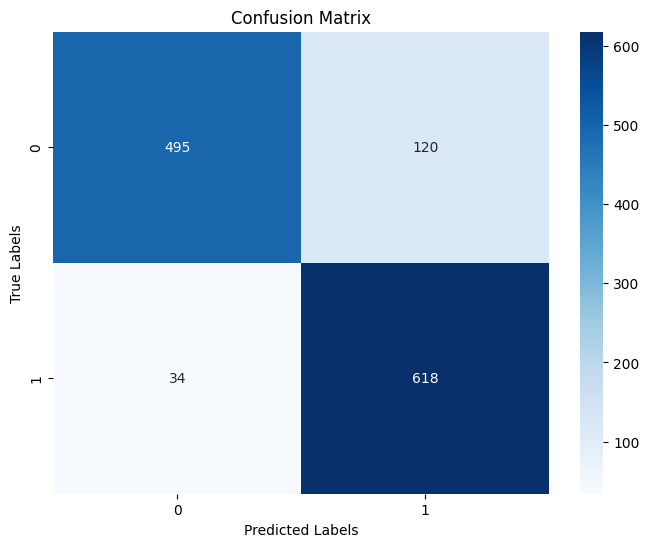

Naive Bayes - Accuracy:  0.8784530386740331
Naive Bayes - Mean Squared Error:  0.12154696132596685
Naive Bayes - Confusion Matrix:
 [[495 120]
 [ 34 618]]


In [ ]:
# Naive Bayes training
accuracy_nb, mse_nb, cm_nb = train_model(naive_bayes.MultinomialNB(alpha=0.2), xtrain_tfidf, train_y, xvalid_tfidf)
print("Naive Bayes - Accuracy: ", accuracy_nb)
print("Naive Bayes - Mean Squared Error: ", mse_nb)
print("Naive Bayes - Confusion Matrix:\n", cm_nb)

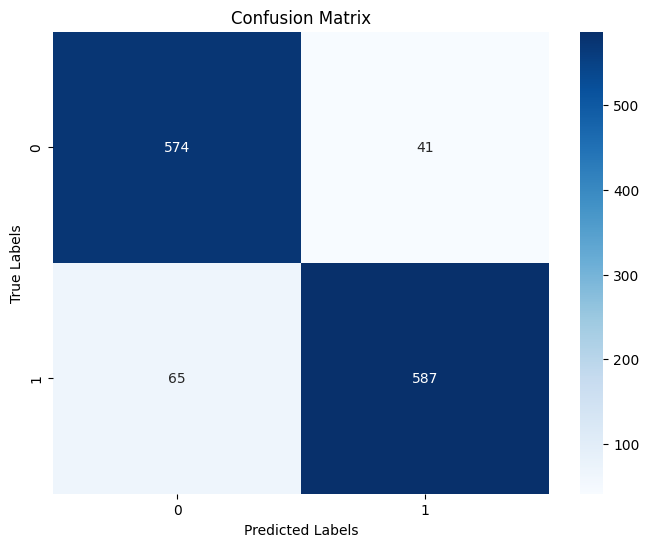

Logistic Regression - Accuracy:  0.9163378058405682
Logistic Regression - Mean Squared Error:  0.08366219415943173
Logistic Regression - Confusion Matrix:
 [[574  41]
 [ 65 587]]


In [ ]:
# Linear Classifier on Word Level TF IDF Vectors
accuracy_lr, mse_lr, cm_lr = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("Logistic Regression - Accuracy: ", accuracy_lr)
print("Logistic Regression - Mean Squared Error: ", mse_lr)
print("Logistic Regression - Confusion Matrix:\n", cm_lr)

In [ ]:
# Importing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

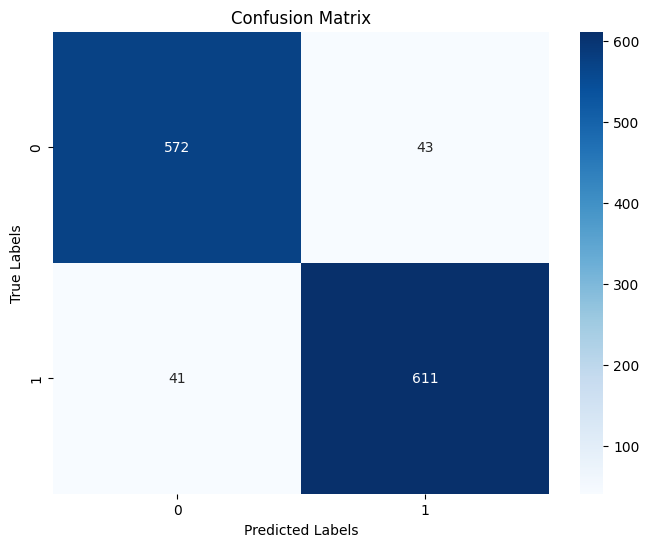

SVM - Accuracy:  0.9337016574585635
SVM - Mean Squared Error:  0.06629834254143646
SVM - Confusion Matrix:
 [[572  43]
 [ 41 611]]


In [ ]:
# Support Vector Machine (SVM) training (take time)
accuracy_svm, mse_svm, cm_svm = train_model(SVC(kernel='linear'), xtrain_tfidf, train_y, xvalid_tfidf)
print("SVM - Accuracy: ", accuracy_svm)
print("SVM - Mean Squared Error: ", mse_svm)
print("SVM - Confusion Matrix:\n", cm_svm)

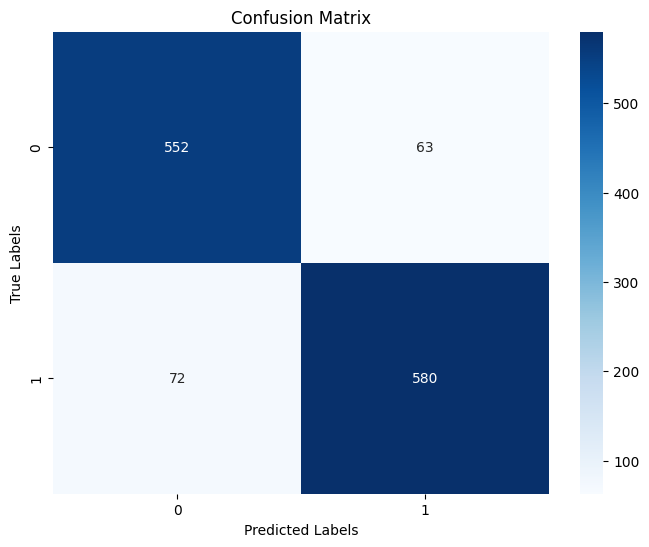

Random Forest - Accuracy:  0.89344909234412
Random Forest - Mean Squared Error:  0.10655090765588003
Random Forest - Confusion Matrix:
 [[552  63]
 [ 72 580]]


In [ ]:
# Random Forest Classifier training
accuracy_rf, mse_rf, cm_rf = train_model(RandomForestClassifier(n_estimators=100), xtrain_tfidf, train_y, xvalid_tfidf)
print("Random Forest - Accuracy: ", accuracy_rf)
print("Random Forest - Mean Squared Error: ", mse_rf)
print("Random Forest - Confusion Matrix:\n", cm_rf)

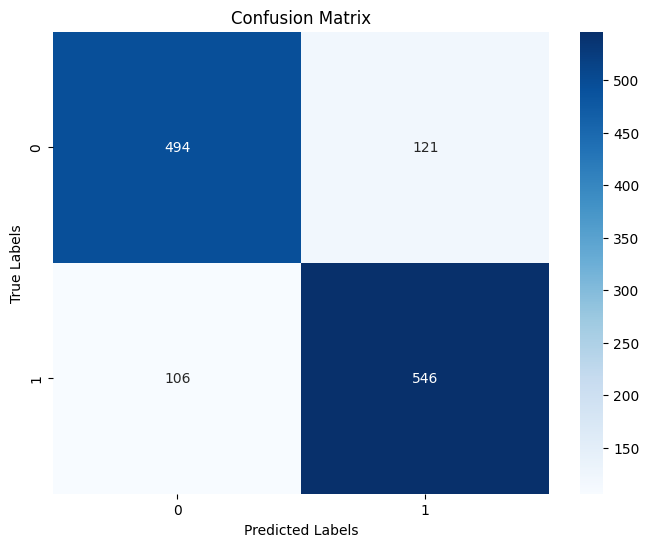

Decision Tree - Accuracy:  0.8208366219415943
Decision Tree - Mean Squared Error:  0.17916337805840568
Decision Tree - Confusion Matrix:
 [[494 121]
 [106 546]]


In [ ]:
# Decision Tree Classifier training
accuracy_dt, mse_dt, cm_dt = train_model(DecisionTreeClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("Decision Tree - Accuracy: ", accuracy_dt)
print("Decision Tree - Mean Squared Error: ", mse_dt)
print("Decision Tree - Confusion Matrix:\n", cm_dt)

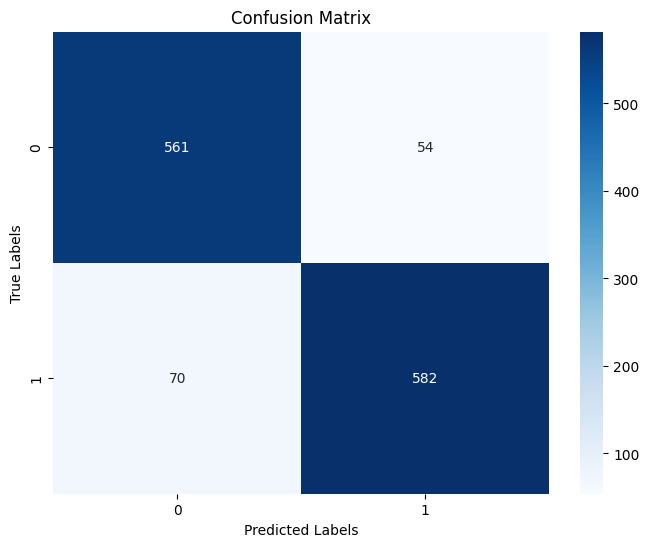

Gradient Boosting - Accuracy:  0.9021310181531176
Gradient Boosting - Mean Squared Error:  0.0978689818468824
Gradient Boosting - Confusion Matrix:
 [[561  54]
 [ 70 582]]


In [ ]:
# Gradient Boosting Classifier training
accuracy_gb, mse_gb, cm_gb = train_model(GradientBoostingClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("Gradient Boosting - Accuracy: ", accuracy_gb)
print("Gradient Boosting - Mean Squared Error: ", mse_gb)
print("Gradient Boosting - Confusion Matrix:\n", cm_gb)

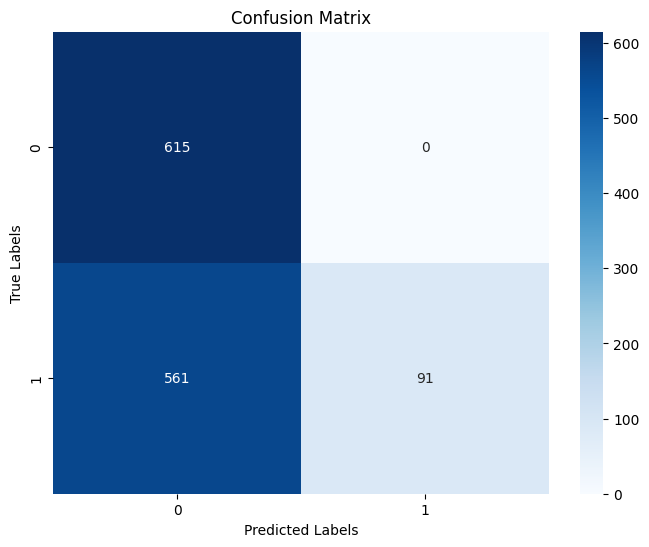

KNN - Accuracy:  0.5572217837411207
KNN - Mean Squared Error:  0.44277821625887925
KNN - Confusion Matrix:
 [[615   0]
 [561  91]]


In [ ]:
# K-Nearest Neighbors (KNN) Classifier training
accuracy_knn, mse_knn, cm_knn = train_model(KNeighborsClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("KNN - Accuracy: ", accuracy_knn)
print("KNN - Mean Squared Error: ", mse_knn)
print("KNN - Confusion Matrix:\n", cm_knn)

## Save the model

In [ ]:
import joblib
def save_model(model, filename):
    # Save the model to a file using joblib
    joblib.dump(model, filename)
    print(f"Model saved as {filename}")

In [ ]:
# Save the Naive Bayes model
save_model(naive_bayes.MultinomialNB(alpha=0.2), "naive_bayes_model.joblib")

Model saved as naive_bayes_model.joblib


In [ ]:
# Save the Logistic Regression model
save_model(linear_model.LogisticRegression(), "logistic_regression_model.joblib")

Model saved as logistic_regression_model.joblib


In [ ]:
# SVM
save_model(SVC(kernel='linear'), "svm_model.joblib")

Model saved as svm_model.joblib


In [ ]:
# Random Forest
save_model(RandomForestClassifier(n_estimators=100), "random_forest_model.joblib")

Model saved as random_forest_model.joblib


In [ ]:
# Decision Tree
save_model(DecisionTreeClassifier(), "decision_tree_model.joblib")

Model saved as decision_tree_model.joblib


In [ ]:
# Gradient Boosting
save_model(GradientBoostingClassifier(), "gradient_boosting_model.joblib")

Model saved as gradient_boosting_model.joblib


In [ ]:
# K-Nearest Neighbors (KNN)
save_model(KNeighborsClassifier(), "knn_model.joblib")

Model saved as knn_model.joblib
